In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import pickle

In [2]:
len(glob("res_tmp/*/*.csv"))

6055

In [3]:
dfs = []
trees = []
for filename in tqdm(glob("res_tmp/*/*.csv")):
    dfs.append(pd.read_csv(filename))
    dfs[-1]['dataset'] = filename.split('/')[1]
    dfs[-1]['filename'] = filename
    #with open(filename.replace('.csv', '.pickle'), 'rb') as f:
    #    trees.append(pickle.load(f))

  0%|          | 0/6055 [00:00<?, ?it/s]

In [4]:
marker_HDT = 'o' #'o'
marker_ONLY = 's' #r'$1$'
marker_no = '^' #'_'
marker_no_family = '*' # 'x'

viz_dict = {
    'HDT': (r'$\mathrm{HDT}$', marker_HDT, 'black'),
    
    'ONLY_Decision': (r'$\mathrm{UDT}$', marker_ONLY, '#a6cee3'),
    'ONLY_ObliqueDecision': (r'$\mathrm{ODT}$', marker_ONLY, '#1f78b4'),
    'ONLY_Pivot': (r'$\mathrm{PT}$', marker_ONLY, '#b2df8a'),
    'ONLY_MultiplePivot': (r'$\mathrm{PPT}$', marker_ONLY, '#33a02c'),
    'ONLY_PartialPivot': (r'$\mathrm{SPT}$', marker_ONLY, '#fb9a99'),
    'ONLY_PartialProximity': (r'$\mathrm{SPPT}$', marker_ONLY, '#e31a1c'),

    'HDT_no_DecisionTreeStumpClassifier': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{UD}}$', marker_no, '#a6cee3'),
    'HDT_no_ObliqueDecisionTreeStumpClassifier': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{OD}}$', marker_no, '#1f78b4'),
    'HDT_no_PivotTreeStumpClassifier': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{P}}$', marker_no, '#b2df8a'),
    'HDT_no_MultiplePivotTreeStumpClassifier': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{PP}}$', marker_no, '#33a02c'),
    'HDT_no_PartialPivotTreeStumpClassifier': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{SP}}$', marker_no, '#fb9a99'),
    'HDT_no_PartialProximityTreeStumpClassifier': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{SPP}}$', marker_no, '#e31a1c'),

    'HDT_no_classic': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{UD}, \mathrm{OD}}$', marker_no_family, '#1f78b4'),
    'HDT_no_pivot': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{P}, \mathrm{PP}}$', marker_no_family, '#33a02c'),
    'HDT_no_partial': (r'$\mathrm{HDT}^{\, - \,}_{\mathrm{SP}, \mathrm{SPP}}$', marker_no_family, '#e31a1c'),
    'Dart': ['DART']
}

In [5]:
df = pd.concat(dfs, ignore_index=True)
df = df[~(df.method == 'DT')]
print(df.shape)

#selection = 'elbow'
selection = 'random'

#hyper_str = f"'n_shapelets': 100, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': '{selection}'"
#hyper_str_p = f"'n_shapelets': 100, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': '{selection}'"


#df = df[
#    df['PartialPivotTreeStumpClassifier'].apply(lambda x: hyper_str in x if isinstance(x, str) else True) &
#    df['PartialProximityTreeStumpClassifier'].apply(lambda x: hyper_str_p in x if isinstance(x, str) else True)
#]

print(df.shape)
df.head(2)

(5818, 83)
(5818, 83)


,max_depth,prune_useless_leaves,stump_selection,random_state,splitter,base_stumps,distance_measure,method,PartialPivotTreeStumpClassifier,train_time,...,ObliqueDecisionTreeStumpClassifier,PivotTreeStumpClassifier,MultiplePivotTreeStumpClassifier,PartialProximityTreeStumpClassifier,criterion,boosting_type,num_leaves,loss,max_iter,USE_COMB
0,6.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 10, 'n_ts_for_selection': 0.5,...",155.249993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,XGB,NaN,14.295234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
c = ['dataset', 'method', 'USE_COMB', 'f1_macro_val', 'f1_macro_test', 'train_time']

df[(df.USE_COMB == True) | (df.USE_COMB == False)][c].sort_values(by=c)

,dataset,method,USE_COMB,f1_macro_val,f1_macro_test,train_time
3079,adult,HDT_no_partial,False,0.763625,0.785545,537.735962
3115,adult,HDT_no_partial,True,0.763625,0.785545,534.504192
3117,adult,ONLY_MultiplePivot,True,0.728515,0.753002,339.618725
3083,adult,ONLY_PartialPivot,False,0.763588,0.781791,82.992004
3093,adult,ONLY_PartialPivot,False,0.770254,0.795929,241.989974
...,...,...,...,...,...,...
5351,taiwan_credit,ONLY_PartialPivot,True,0.665065,0.671113,1024.842759
5342,taiwan_credit,ONLY_Pivot,False,0.658560,0.667000,271.987306
5323,taiwan_credit,ONLY_Pivot,True,0.651433,0.644108,405.896636
5330,taiwan_credit,ONLY_Pivot,True,0.658560,0.667000,283.019598


In [391]:
from aeon.visualisation import plot_critical_difference

df_best = df.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='f1_macro_test')

#df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

df_best_pivot.style.background_gradient(cmap='coolwarm')

method,AB,Dart,EBM,ETC,ETsC,GBC,HDT,HDT_no_partial,HDT_no_pivot,HGBC,LGBM,ONLY_Decision,ONLY_MultiplePivot,ONLY_ObliqueDecision,ONLY_PartialPivot,ONLY_PartialProximity,ONLY_Pivot,RF,XGB
dataset,,,,,,,,,,,,,,,,,,,
adult,0.802668,0.820070,0.822812,0.739649,0.770418,0.822519,0.780905,0.785545,0.751049,0.804074,0.822401,0.782789,0.753002,0.782960,0.795929,0.767598,0.771973,0.793950,0.820632
algerian,0.958333,0.979033,0.958333,0.895165,0.937844,0.979033,0.958333,0.979033,0.958333,0.958333,0.958333,0.979033,0.937844,0.979033,0.958333,0.937844,0.916667,0.958333,0.958333
auction,0.858380,0.983056,0.994446,0.719986,0.880227,0.994446,0.983610,0.879336,0.983056,0.953628,0.988799,0.994446,0.897853,0.988799,0.983056,0.906895,0.694396,0.940991,0.983056
bank,0.625415,0.632617,0.631274,0.609147,0.616050,0.632914,nan,nan,nan,0.629800,0.629630,nan,nan,nan,nan,nan,nan,0.623704,0.632617
bankMarketing,0.765000,0.742498,0.772430,0.664589,0.754994,0.767429,0.722754,0.731761,0.746662,0.782466,0.749975,0.745552,0.731087,0.720982,0.736906,0.741490,0.725633,0.752461,0.742498
breast,0.971277,0.971277,0.971277,0.922973,0.951576,0.961486,0.952129,0.913832,0.931367,0.961486,0.961486,0.893467,0.883077,0.893467,0.971863,0.952638,0.952638,0.961486,0.971277
compass,0.972138,0.969339,0.972138,0.936248,0.962295,0.972138,0.972138,0.972138,0.972138,0.972138,0.971439,0.972138,0.969346,0.972138,0.972138,0.972138,0.928188,0.965830,0.972138
covertype,0.724559,0.769948,0.777097,0.586754,0.787499,0.764712,0.722359,0.727541,0.737367,0.769424,0.782488,0.727541,0.650119,0.718196,0.742034,0.774994,0.636680,0.784914,0.769948
diabetes,0.767722,0.703777,0.721492,0.568466,0.692100,0.721492,0.655782,0.609797,0.646465,0.724170,0.674877,0.779909,0.711254,0.739710,0.677518,0.642303,0.623715,0.708912,0.674231


dataset,adult,algerian,auction,bankMarketing,breast,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,ionosphere,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,,,
AB,0.802668,0.958333,0.858380,0.765000,0.971277,0.972138,0.724559,0.767722,0.480934,0.527686,0.719443,0.539031,0.724849,0.856105,0.952296,0.933333,0.480934,0.689454,0.873056,0.922461,0.673559,0.774709,0.564469,0.815296,0.207336
Dart,0.820070,0.979033,0.983056,0.742498,0.971277,0.969339,0.769948,0.703777,0.822487,0.524810,0.730094,0.663616,0.705104,0.908154,0.954105,0.933333,0.822487,0.859497,0.873056,0.934985,0.685231,0.810281,0.781579,0.762639,0.380777
EBM,0.822812,0.958333,0.994446,0.772430,0.971277,0.972138,0.777097,0.721492,0.870632,0.548091,0.728869,0.498003,0.721280,0.908493,0.984420,0.933333,0.870632,0.845588,0.873056,0.942456,0.684036,0.813397,0.784667,0.829409,0.267622
ETC,0.739649,0.895165,0.719986,0.664589,0.922973,0.936248,0.586754,0.568466,0.711855,0.539263,0.598545,0.636111,0.615741,0.876661,0.814783,0.866667,0.635366,0.740186,0.879321,0.810000,0.601743,0.798423,0.651364,0.766677,0.349075
ETsC,0.770418,0.937844,0.880227,0.754994,0.951576,0.962295,0.787499,0.692100,0.898410,0.555162,0.684553,0.543103,0.719489,0.887232,0.969130,0.966583,0.878307,0.885419,0.873056,0.919872,0.680302,0.813397,0.709920,0.815247,0.404608
GBC,0.822519,0.979033,0.994446,0.767429,0.961486,0.972138,0.764712,0.721492,0.893074,0.547429,0.696455,0.629365,0.727161,0.886622,0.937057,0.966583,0.893074,0.797499,0.926284,0.924932,0.690958,0.774370,0.791705,0.840537,0.376913
HDT,0.780905,0.958333,0.983610,0.722754,0.952129,0.972138,0.722359,0.655782,0.855541,0.552363,0.632353,0.470679,0.687812,0.917774,0.908974,0.932660,0.818519,0.783474,0.845202,0.917384,0.695936,0.797241,0.686247,0.778765,0.387224
HDT_no_partial,0.785545,0.979033,0.879336,0.731761,0.913832,0.972138,0.727541,0.609797,0.816799,0.529412,0.677579,0.541222,0.709022,0.897727,0.922098,0.966583,0.816799,0.801137,0.873056,0.927489,0.669374,0.781253,0.682771,0.798030,0.388949
HDT_no_pivot,0.751049,0.958333,0.983056,0.746662,0.931367,0.972138,0.737367,0.646465,0.729637,0.543619,0.411765,0.503755,0.695997,0.908154,0.920493,0.932660,0.819864,0.834644,0.877395,0.917384,0.695663,0.749534,0.680604,0.827778,0.337208


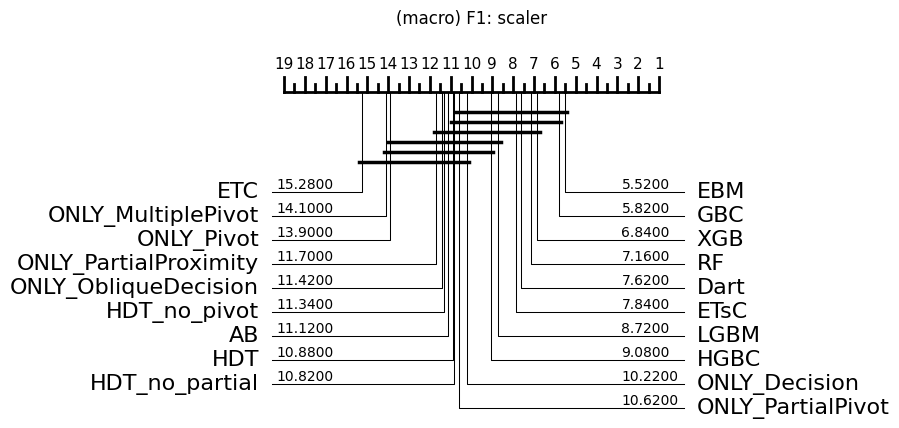

In [392]:
from aeon.visualisation import plot_critical_difference

df_best = df.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='f1_macro_test')

df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

plot_critical_difference(df_best_pivot.values, labels=df_best_pivot.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: scaler')
plt.show()

In [393]:
len(df_best_pivot.index)

25

dataset,adult,algerian,auction,bankMarketing,breast,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,ionosphere,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,,,
ETC,17134.000000,49.000000,797.000000,1581.000000,90.000000,1744.000000,1583.000000,594.000000,209.000000,1582.000000,736.000000,148.000000,7227.000000,227.000000,80.000000,21.000000,248.000000,618.000000,69.000000,861.000000,19039.000000,636.000000,532.000000,186.000000,5544.000000
HDT,6.000000,2.000000,27.000000,13.000000,11.000000,2.000000,24.000000,1.000000,25.000000,5.000000,5.000000,18.000000,3.000000,22.000000,6.000000,4.000000,19.000000,33.000000,7.000000,1.000000,3.000000,54.000000,24.000000,10.000000,977.000000
HDT_no_partial,22.000000,3.000000,36.000000,5.000000,8.000000,2.000000,3.000000,1.000000,16.000000,3.000000,11.000000,21.000000,9.000000,16.000000,10.000000,5.000000,16.000000,47.000000,10.000000,13.000000,20.000000,53.000000,34.000000,6.000000,1108.000000
HDT_no_pivot,1.000000,1.000000,26.000000,13.000000,1.000000,2.000000,6.000000,1.000000,36.000000,3.000000,0.000000,25.000000,1.000000,19.000000,1.000000,2.000000,10.000000,63.000000,9.000000,1.000000,1.000000,1.000000,43.000000,3.000000,1103.000000
ONLY_Decision,38.000000,3.000000,40.000000,61.000000,13.000000,2.000000,3.000000,17.000000,25.000000,6.000000,34.000000,9.000000,11.000000,21.000000,14.000000,7.000000,25.000000,67.000000,11.000000,30.000000,46.000000,5.000000,74.000000,21.000000,1412.000000
ONLY_MultiplePivot,38.000000,5.000000,119.000000,41.000000,18.000000,10.000000,44.000000,11.000000,44.000000,196.000000,361.000000,38.000000,40.000000,77.000000,25.000000,10.000000,44.000000,102.000000,9.000000,33.000000,31.000000,36.000000,268.000000,74.000000,2625.000000
ONLY_ObliqueDecision,38.000000,3.000000,40.000000,23.000000,13.000000,2.000000,2.000000,18.000000,31.000000,155.000000,13.000000,34.000000,49.000000,24.000000,2.000000,2.000000,31.000000,57.000000,11.000000,14.000000,44.000000,10.000000,80.000000,19.000000,1430.000000
ONLY_PartialPivot,34.000000,2.000000,21.000000,14.000000,8.000000,2.000000,10.000000,1.000000,12.000000,81.000000,12.000000,31.000000,13.000000,11.000000,12.000000,2.000000,27.000000,33.000000,14.000000,13.000000,10.000000,23.000000,69.000000,10.000000,1171.000000
ONLY_PartialProximity,51.000000,1.000000,20.000000,41.000000,4.000000,2.000000,32.000000,23.000000,8.000000,1.000000,7.000000,7.000000,4.000000,7.000000,8.000000,2.000000,11.000000,32.000000,3.000000,6.000000,2.000000,7.000000,8.000000,4.000000,346.000000


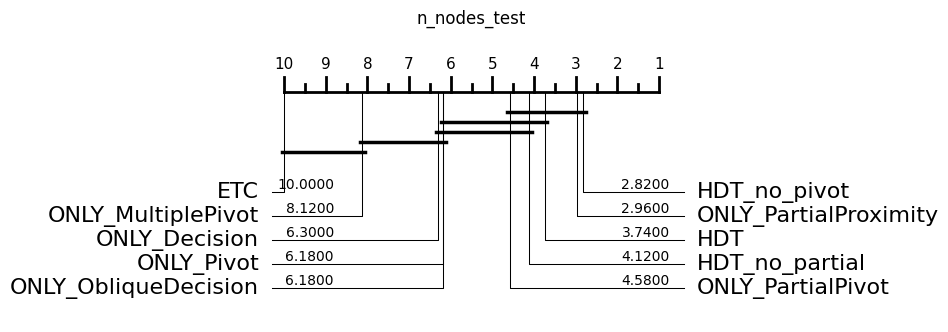

In [394]:
from aeon.visualisation import plot_critical_difference

df_best = df.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='n_nodes_test')

df_best_pivot.dropna(subset=['iris'], inplace=True, axis=1)
df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

plot_critical_difference(df_best_pivot.values, labels=df_best_pivot.columns, lower_better=True, alpha=.1, test='nemenyi')
plt.title('n_nodes_test')
plt.show()

dataset,adult,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,
AB,28.569916,0.177554,1.927724,2.421752,7.845061,3.037354,0.216089,1.797949,4.141462,1.607756,1.706538,8.427676,0.178446,0.081523,2.006098,0.572486,0.182084,0.445125,56.822667,2.857414,3.090336,0.112649,5.148582
Dart,3.458496,0.318848,470.046898,83.813737,21.262813,1.039222,28.771791,1315.549866,142.334759,6.429654,176.577736,3.660361,150.739298,22.048290,7001.024220,12.549385,154.222192,100.895056,7.057045,9.247128,852.096322,14.726559,3241.485848
EBM,60.277235,154.185545,31.197426,8.342467,8.136343,5.861148,10.111136,0.721168,4.356628,2.257636,0.603370,3.905041,34.230824,0.771720,0.266903,1.885066,1.297883,10.636164,8.320351,14.209146,5.284469,0.444833,2.971932
ETC,0.036948,0.000797,0.001624,0.001761,0.003378,0.002222,0.001091,0.000823,0.002411,0.001274,0.000844,0.010617,0.000868,0.000700,0.000973,0.003622,0.000749,0.002144,0.026712,0.001132,0.001864,0.000799,0.005676
ETsC,6.793016,0.192567,0.220479,0.260473,3.978729,2.208891,0.242188,2.386723,2.672694,0.219646,2.134818,5.967384,1.899145,0.190104,0.169934,0.184947,2.137632,0.299492,5.366393,0.240852,2.198095,0.165578,1.509936
GBC,36.362152,0.114829,2.850915,0.334818,0.572336,0.531982,0.258467,1.886022,0.800344,2.000937,5.205035,2.291394,0.162325,0.317611,0.956522,58.152450,5.850546,0.871507,11.735197,0.201247,20.762595,4.711236,118.043056
HDT,560.224857,30.350015,443.358638,976.069554,77.285057,352.570752,31.386322,901.803803,1061.273515,120.280333,320.152803,4670.083122,224.011405,62.336390,766.377859,753.359970,111.391864,146.135022,1270.019222,1238.051651,3041.646139,160.000377,14322.514322
HDT_no_partial,325.948288,0.165623,4.893617,2.166587,30.937138,8.769265,0.306893,3.484901,3.253386,1.439990,1.370542,62.030549,0.640565,0.364037,1.599955,72.290780,0.569950,5.972203,405.357566,1.966084,3.952726,0.301428,159.695396
HDT_no_pivot,100.874422,10.860188,292.812863,163.641348,25.394146,64.645092,8.535758,274.810559,177.315004,73.393834,203.397482,22.006946,203.034898,26.440788,87.580733,2790.486928,116.697369,14.464339,43.891356,9.390716,1020.689036,33.387416,12671.833400


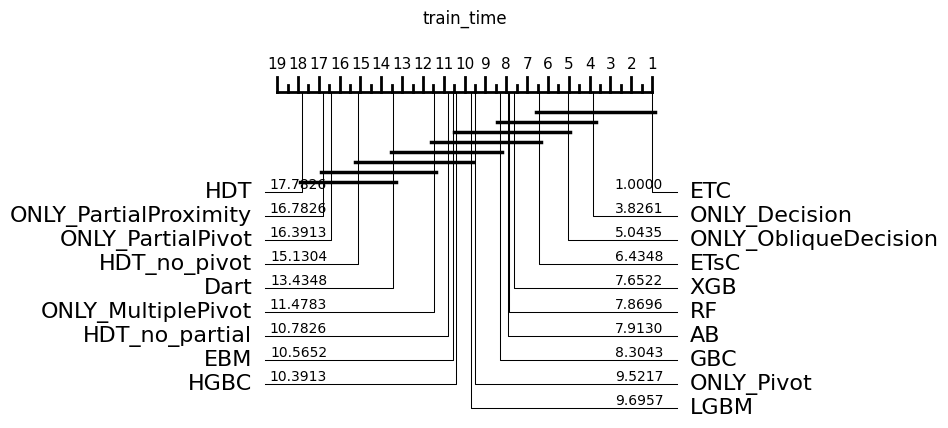

In [265]:
from aeon.visualisation import plot_critical_difference

df_best = df.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='train_time')

df_best_pivot.dropna(subset=['iris'], inplace=True, axis=1)
df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

plot_critical_difference(df_best_pivot.values, labels=df_best_pivot.columns, lower_better=True, alpha=.1, test='nemenyi')
plt.title('train_time')
plt.show()

dataset,adult,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,
AB,0.802668,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.645650,0.561884,0.719443,0.539031,0.724849,0.877778,0.933333,0.645650,0.723848,0.873056,0.929972,0.677998,0.782591,0.635060,0.815296,0.207336
Dart,0.820070,0.979033,0.988799,0.742498,0.969339,0.769948,0.703777,0.869338,0.524810,0.730094,0.730371,0.705104,0.918519,0.933333,0.869338,0.859497,0.873056,0.934985,0.685231,0.811331,0.781579,0.762639,0.394170
EBM,0.822812,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.548091,0.728869,0.498003,0.721280,0.908493,0.933333,0.870632,0.845588,0.873056,0.942456,0.684036,0.813397,0.784667,0.829409,0.267622
ETC,0.739649,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.539263,0.598545,0.636111,0.615741,0.876661,0.866667,0.635366,0.740186,0.879321,0.810000,0.601743,0.798423,0.651364,0.766677,0.349075
ETsC,0.770418,0.937844,0.885399,0.754994,0.962295,0.787499,0.692100,0.898410,0.581980,0.697329,0.577716,0.720639,0.897727,0.966583,0.898410,0.885419,0.873056,0.934868,0.681018,0.813397,0.724116,0.815247,0.418030
GBC,0.822519,0.979033,0.994446,0.767429,0.972138,0.764712,0.721492,0.893074,0.547429,0.711599,0.679365,0.727161,0.897727,0.966583,0.893074,0.857180,0.926284,0.929937,0.690958,0.774370,0.791705,0.840537,0.376913
HDT,0.780905,0.979033,1.000000,0.757462,0.972138,0.774639,0.775401,0.895115,0.555765,0.663628,0.740123,0.696962,0.929177,0.966583,0.897764,0.870323,0.926284,0.919928,0.697177,0.827268,0.760290,0.854106,0.396576
HDT_no_partial,0.730601,0.979033,0.893785,0.741788,0.972138,0.731761,0.707542,0.816799,0.551366,0.714286,0.564546,0.711328,0.908154,0.966583,0.816799,0.804641,0.876628,0.927489,0.679316,0.805435,0.716348,0.826547,0.388949
HDT_no_pivot,0.751049,0.979033,0.994446,0.764906,0.972832,0.769793,0.739500,0.891667,0.543619,0.411765,0.834298,0.700925,0.929032,1.000000,0.879274,0.844309,0.952137,0.917384,0.695823,0.830904,0.746170,0.851017,0.371305


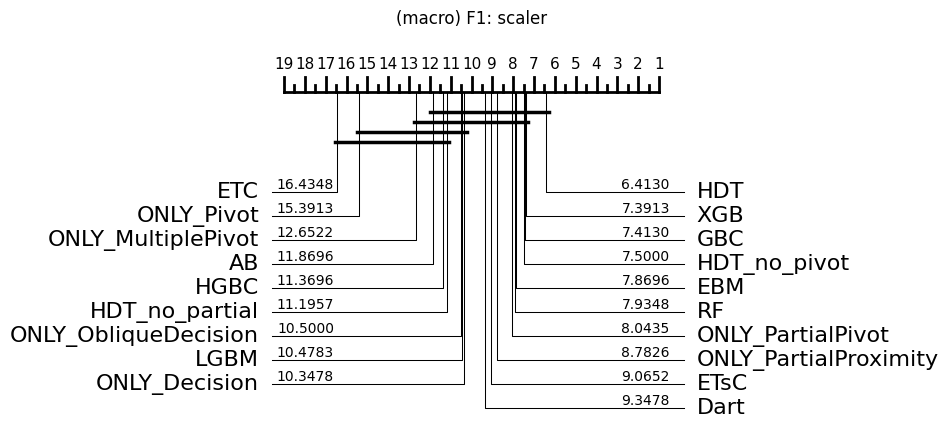

In [266]:
from aeon.visualisation import plot_critical_difference

df_best = df.sort_values(by=["dataset", "method", 'f1_macro_test',], ascending=False).groupby(["dataset", "method"]).head(1)

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='f1_macro_test')

df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

plot_critical_difference(df_best_pivot.values, labels=df_best_pivot.columns, lower_better=False, alpha=.1, test='nemenyi')
plt.title('(macro) F1: scaler')
plt.show()

In [396]:
df_dataset.method.unique()

array(['ONLY_PartialPivot', 'XGB', 'HDT', 'HDT_no_pivot',
       'HDT_no_partial', 'ONLY_Decision', 'ONLY_PartialProximity', 'Dart',
       'ONLY_Pivot', 'ONLY_MultiplePivot', 'RF', 'LGBM',
       'ONLY_ObliqueDecision', 'ETC', 'GBC', 'AB', 'ETsC', 'EBM', 'HGBC'],
      dtype=object)

FINAL DATASETS:	19	['vertebral' 'glass' 'compass' 'auction' 'diabetes' 'titanic' 'page'
 'sonar' 'vehicle' 'ecoli' 'wine' 'home' 'magic' 'algerian' 'covertype'
 'bankMarketing' 'iris' 'bank' 'seeds']


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

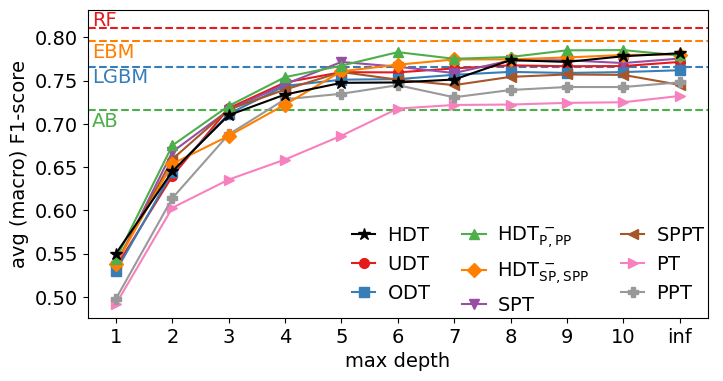

In [469]:
import matplotlib.pyplot as plt

def make_plot(df): #HDT poi HDT-P,PT e poi HDT-SP,SPP

    methods = [
        'HDT', 'ONLY_Decision', 'ONLY_ObliqueDecision',
        'HDT_no_pivot', 
        'HDT_no_partial', 
        'ONLY_PartialPivot', 'ONLY_PartialProximity',
        'ONLY_Pivot', 'ONLY_MultiplePivot',
        'RF', 'LGBM', 
        #'XGB', 
        #'Dart', 
        'AB', 
        'ETC', 'GBC', 'ETsC', 'EBM', 'HGBC'
    ]

    df_method = df[df.method.isin(methods)]
    #display(df_method.groupby(['dataset', 'method'])[['max_depth']].agg([set]).reset_index())

    dataset_to_drop = []
    for dataset, method, depth_set in df_method.groupby(['dataset', 'method'])[['max_depth']].agg([set]).reset_index().values:
        depth_set = set([f'{x}' for x in depth_set])
        if method not in methods or method in ['RF', 'LGBM', 'AB', 'ETC', 'GBC', 'ETsC', 'EBM', 'HGBC']:
            continue
        if len(depth_set) != 11:
            dataset_to_drop += [dataset]
            #print(dataset, depth_set, method)
    dataset_to_drop = set(dataset_to_drop)

    #print(dataset_to_drop)

    df = df.copy(deep=True)
    df = df[~df.dataset.isin(dataset_to_drop)]

    print("FINAL DATASETS:", len(df.dataset.unique()), df.dataset.unique(), sep='\t')
    
    offsets = np.linspace(-0.3, 0.3, len(df.method.unique()))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'P', 'X', '*']
    colors = ['#e41a1c','#377eb8','#4daf4a','#ff7f00','#984ea3','#a65628','#f781bf','#999999']
    
    plt.figure(figsize=(8, 4))
    
    c_tree = -1
    c_ens = 0
    
    for i, method in enumerate(tqdm(methods)):
        #if i == 5:
        #    plt.scatter(6, .6, c='white', label=' ')
        df_base_stumps = df[(df.method == method)].copy(deep=True).fillna({'max_depth': 11})
        
        grouped = []
        for depth in df_base_stumps.max_depth.unique():
            subset = df_base_stumps[df_base_stumps.max_depth <= depth]
            best = subset.sort_values(by=["dataset", "f1_macro_val"], ascending=False).groupby("dataset").head(1)
            best["max_depth"] = depth  # assign current depth for aggregation
            grouped.append(best)
        
        grouped = pd.concat(grouped)
        grouped = grouped.groupby("max_depth")["f1_macro_test"].agg(["mean", "std"])
    
        if method in ['ETC', 'HGBC', 'ETsC', 'GBC']:
            continue
    
        label = viz_dict.get(method, [method])[0]
        
        color = colors[c_tree % len(colors)] if c_tree != -1 else 'black'
        marker = markers[c_tree % len(markers)]
    
        if len(grouped) == 1:
            continue
        
        
        if i == 0:
            plt.plot(grouped.index, grouped['mean'], label=label, color=color, marker=marker, zorder=1000, ms=9 if i == 0 else 7)
        elif i in [3, 4]:
            plt.plot(grouped.index, grouped['mean'], label=label, color=color, marker=marker, zorder=100-i, ms=9 if i == 0 else 7)
        else:
            plt.plot(grouped.index, grouped['mean'], label=label, color=color, marker=marker, zorder=10, ms=9 if i == 0 else 7)
        c_tree += 1
    
    
    
    for i, method in enumerate(tqdm(methods)):
        
        df_base_stumps = df[(df.method == method)].copy(deep=True).fillna({'max_depth': 11})
        
        grouped = []
        for depth in df_base_stumps.max_depth.unique():
            subset = df_base_stumps[df_base_stumps.max_depth <= depth]
            best = subset.sort_values(by=["dataset", "f1_macro_val"], ascending=False).groupby("dataset").head(1)
            best["max_depth"] = depth  # assign current depth for aggregation
            grouped.append(best)
        
        grouped = pd.concat(grouped)
        grouped = grouped.groupby("max_depth")["f1_macro_test"].agg(["mean", "std"])
    
        if method in ['ETC', 'HGBC', 'ETsC', 'GBC']:
            continue
    
        label = viz_dict.get(method, [method])[0]
        
        color = colors[c_tree % len(colors)]
        marker = markers[c_tree % len(markers)]
    
        if len(grouped) == 1:
            color = colors[c_ens % len(colors)]
            plt.axhline(y=grouped.values[0, 0], color=color, 
                        #label = method, 
                        ls='--')
            if method == 'RF':
                plt.text(.58, grouped.values[0, 0]+.003, method, fontsize=14, color=color)
            else:
                plt.text(.58, grouped.values[0, 0]-.019, method, fontsize=14, color=color)
            c_ens += 1
            continue
        else: 
            continue
        
        plt.plot(grouped.index, grouped['mean'], label=label, color=color, marker=marker)
        c_tree += 1
    
    plt.xlabel('max depth', fontsize=14)
    plt.ylabel('avg (macro) F1-score', fontsize=14)
    #plt.grid(True)
    
    plt.legend(
        #bbox_to_anchor=(1.02, 1.45), 
        #loc='upper right',
        #columnspacing=1.2,
        #handletextpad=.5,
        #handlelength=1.7
        fontsize=14,
        ncol=3,
        frameon=False,
        bbox_to_anchor=(1.025, .36), 
        loc='upper right',
        columnspacing=1.6,
        handletextpad=.6,
        handlelength=1.2
    )
    
    plt.xticks(ticks=range(1, 12), labels=[str(i) if i < 11 else "inf" for i in range(1, 12)], fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(top=.832)
    
    plt.savefig("z_img_3Final_scatter_F1_vs_depth.png", dpi=300, bbox_inches='tight', )
    
    plt.show()

make_plot(df)

In [400]:
df

,max_depth,prune_useless_leaves,stump_selection,random_state,splitter,base_stumps,distance_measure,method,PartialPivotTreeStumpClassifier,train_time,...,ObliqueDecisionTreeStumpClassifier,PivotTreeStumpClassifier,MultiplePivotTreeStumpClassifier,PartialProximityTreeStumpClassifier,criterion,boosting_type,num_leaves,loss,max_iter,USE_COMB
0,6.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 10, 'n_ts_for_selection': 0.5,...",155.249993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,XGB,NaN,14.295234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",52.147909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,best,42.0,best,"['DecisionTreeStumpClassifier', 'ObliqueDecisi...",euclidean,HDT,"{'n_shapelets': 100, 'n_ts_for_selection': 0.5...",192.044737,...,"{'max_depth': 1, 'random_state': 42, 'oblique_...","{'max_depth': 1, 'random_state': 42}","{'max_depth': 1, 'random_state': 42}","{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 100, 'n_ts_for_selection': 0.5...",167.737758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048,5.0,True,best,42.0,best,"['DecisionTreeStumpClassifier', 'ObliqueDecisi...",euclidean,HDT_no_pivot,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",114.101720,...,"{'max_depth': 1, 'random_state': 42, 'oblique_...",NaN,NaN,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",NaN,NaN,NaN,NaN,NaN,NaN
6049,3.0,True,best,42.0,best,"['DecisionTreeStumpClassifier', 'ObliqueDecisi...",euclidean,HDT_no_pivot,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",54.298944,...,"{'max_depth': 1, 'random_state': 42, 'oblique_...",NaN,NaN,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",NaN,NaN,NaN,NaN,NaN,NaN
6050,10.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 10, 'n_ts_for_selection': 0.1,...",172.341542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6051,1.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 10, 'n_ts_for_selection': 0.5,...",10.286107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dataset,adult,algerian,auction,bankMarketing,breast,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,ionosphere,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,,,
HDT,6.000000,2.000000,27.000000,13.000000,11.000000,2.000000,24.000000,1.000000,25.000000,5.000000,5.000000,18.000000,3.000000,22.000000,6.000000,4.000000,19.000000,33.000000,7.000000,1.000000,3.000000,54.000000,24.000000,10.000000,977.000000
HDT_no_partial,22.000000,3.000000,36.000000,5.000000,8.000000,2.000000,3.000000,1.000000,16.000000,3.000000,11.000000,21.000000,9.000000,16.000000,10.000000,5.000000,16.000000,47.000000,10.000000,13.000000,20.000000,53.000000,34.000000,6.000000,1108.000000
HDT_no_pivot,1.000000,1.000000,26.000000,13.000000,1.000000,2.000000,6.000000,1.000000,36.000000,3.000000,0.000000,25.000000,1.000000,19.000000,1.000000,2.000000,10.000000,63.000000,9.000000,1.000000,1.000000,1.000000,43.000000,3.000000,1103.000000
ONLY_Decision,38.000000,3.000000,40.000000,61.000000,13.000000,2.000000,3.000000,17.000000,25.000000,6.000000,34.000000,9.000000,11.000000,21.000000,14.000000,7.000000,25.000000,67.000000,11.000000,30.000000,46.000000,5.000000,74.000000,21.000000,1412.000000
ONLY_MultiplePivot,38.000000,5.000000,119.000000,41.000000,18.000000,10.000000,44.000000,11.000000,44.000000,196.000000,361.000000,38.000000,40.000000,77.000000,25.000000,10.000000,44.000000,102.000000,9.000000,33.000000,31.000000,36.000000,268.000000,74.000000,2625.000000
ONLY_ObliqueDecision,38.000000,3.000000,40.000000,23.000000,13.000000,2.000000,2.000000,18.000000,31.000000,155.000000,13.000000,34.000000,49.000000,24.000000,2.000000,2.000000,31.000000,57.000000,11.000000,14.000000,44.000000,10.000000,80.000000,19.000000,1430.000000
ONLY_PartialPivot,34.000000,2.000000,21.000000,14.000000,8.000000,2.000000,10.000000,1.000000,12.000000,81.000000,12.000000,31.000000,13.000000,11.000000,12.000000,2.000000,27.000000,33.000000,14.000000,13.000000,10.000000,23.000000,69.000000,10.000000,1171.000000
ONLY_PartialProximity,51.000000,1.000000,20.000000,41.000000,4.000000,2.000000,32.000000,23.000000,8.000000,1.000000,7.000000,7.000000,4.000000,7.000000,8.000000,2.000000,11.000000,32.000000,3.000000,6.000000,2.000000,7.000000,8.000000,4.000000,346.000000
ONLY_Pivot,45.000000,1.000000,70.000000,45.000000,14.000000,98.000000,68.000000,7.000000,20.000000,151.000000,13.000000,37.000000,10.000000,13.000000,13.000000,5.000000,20.000000,62.000000,4.000000,39.000000,9.000000,62.000000,125.000000,3.000000,1174.000000


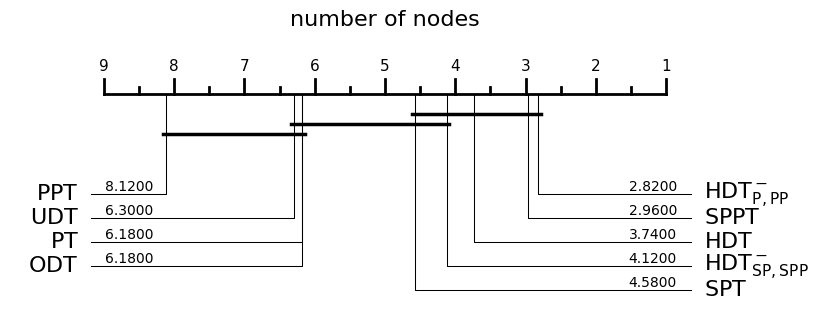

In [430]:
from aeon.visualisation import plot_critical_difference

df_best = df.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='n_nodes_test')

df_best_pivot.dropna(subset=['iris'], inplace=True, axis=1)
df_best_pivot.dropna(inplace=True)
df_best_pivot.drop(columns=['ETC'], inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

plot_critical_difference(df_best_pivot.values, labels=[viz_dict.get(x, [x])[0].replace('{\\, - \\,}', '-') for x in df_best_pivot.columns], 
                         lower_better=True, alpha=.1, test='nemenyi', width=7.5)
plt.title('number of nodes', fontsize=16)
plt.savefig("z_img_3Final_cd_F1_nodi_all_hyper.png", dpi=300, bbox_inches='tight', )

plt.show()

In [402]:
df_best_pivot.shape[0]

25

In [403]:
df_base_stumps.sort_values(by=["dataset", 'f1_macro_val', 'max_depth'], ascending=False).groupby(['dataset', 'max_depth'], dropna=False).head(1)

,max_depth,prune_useless_leaves,stump_selection,random_state,splitter,base_stumps,distance_measure,method,PartialPivotTreeStumpClassifier,train_time,...,ObliqueDecisionTreeStumpClassifier,PivotTreeStumpClassifier,MultiplePivotTreeStumpClassifier,PartialProximityTreeStumpClassifier,criterion,boosting_type,num_leaves,loss,max_iter,USE_COMB
3279,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,0.967977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
206,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,597.178338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
2582,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,2.850901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
1867,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,214.671885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
5348,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,3.385738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
1710,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,0.460759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
6016,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,723.554366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
2205,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,0.408451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
3975,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,2269.405017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
5390,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,347.462986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN


dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,eye,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.527686,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.548091,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.539263,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.555162,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
HDT,0.958333,0.977599,0.712484,0.972138,0.714936,0.655782,0.824521,0.544766,0.662773,0.917774,0.932660,0.752577,0.839196,0.873056,0.749534,0.727342,0.627796,0.387224
HDT_no_partial,0.979033,0.888886,0.685000,0.972138,0.684992,0.609797,0.707931,0.519026,0.555066,0.866007,0.966583,0.707931,0.798282,0.873056,0.758435,0.689096,0.826547,0.388949
HDT_no_pivot,0.958333,0.983339,0.714936,0.972138,0.706839,0.646465,0.729637,0.447941,0.562239,0.918182,0.966583,0.489631,0.797897,0.873056,0.749534,0.655089,0.758009,0.337208
ONLY_Decision,0.979033,0.994446,0.697498,0.972138,0.702454,0.593074,0.491694,0.507349,0.613400,0.908154,0.933333,0.491694,0.837266,0.926284,0.758435,0.718635,0.623183,0.362228
ONLY_MultiplePivot,0.897275,0.897853,0.683342,0.923905,0.612478,0.640829,0.694136,0.559725,0.407386,0.907735,0.966583,0.694136,0.771404,0.845202,0.772939,0.654708,0.645930,0.378392


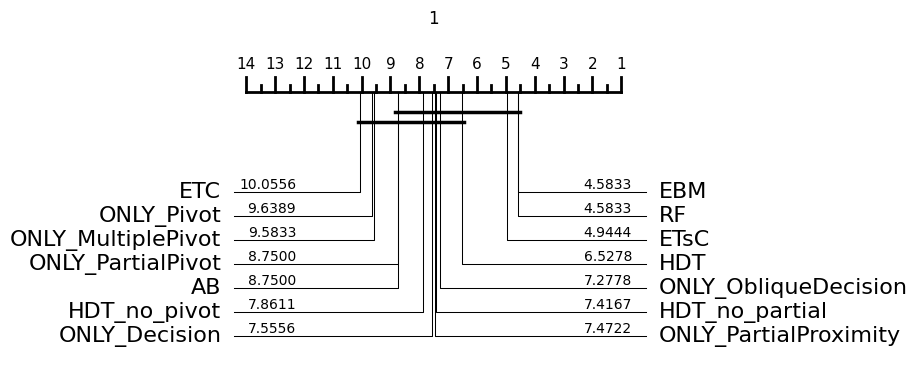

dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,eye,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.527686,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.548091,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.539263,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.555162,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
HDT,0.979033,0.977599,0.665179,0.972138,0.710981,0.663458,0.824521,0.546099,0.662773,0.917774,0.932660,0.752577,0.839196,0.822401,0.802607,0.727342,0.672160,0.387224
HDT_no_partial,0.979033,0.888886,0.724890,0.972138,0.727541,0.593074,0.707931,0.529412,0.555066,0.866007,0.966583,0.707931,0.798282,0.873056,0.791895,0.689096,0.826547,0.388949
HDT_no_pivot,0.958333,0.983339,0.714936,0.972138,0.718196,0.674877,0.729637,0.543619,0.562239,0.876661,0.932660,0.489631,0.797897,0.873056,0.780003,0.655089,0.827778,0.337208
ONLY_Decision,0.979033,0.994446,0.697498,0.972138,0.727541,0.593074,0.491694,0.544590,0.613400,0.908154,0.933333,0.491694,0.837266,0.926284,0.766717,0.718635,0.623183,0.362228
ONLY_MultiplePivot,0.897275,0.897853,0.732016,0.931902,0.612478,0.703188,0.694136,0.559725,0.407386,0.907735,0.966583,0.694136,0.771404,0.876628,0.772939,0.654708,0.645930,0.378392


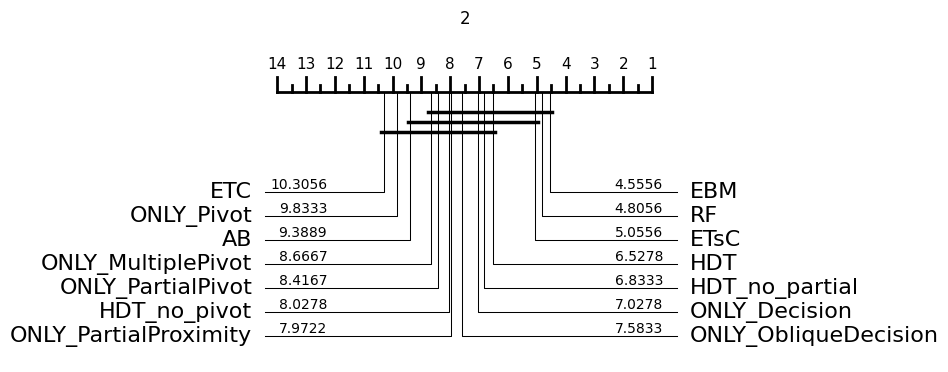

dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
GBC,0.979033,0.994446,0.767429,0.972138,0.764712,0.721492,0.893074,0.629365,0.886622,0.966583,0.893074,0.797499,0.926284,0.774370,0.791705,0.840537,0.376913
HDT,0.958333,0.977599,0.715320,0.972138,0.731087,0.677518,0.824521,0.662773,0.917774,0.966583,0.752577,0.839196,0.876628,0.741957,0.727342,0.627796,0.387224
HDT_no_partial,0.979033,0.888886,0.731761,0.972138,0.722496,0.666454,0.707931,0.555066,0.866007,0.966583,0.707931,0.798282,0.876628,0.791895,0.689096,0.798030,0.388949
HDT_no_pivot,0.979033,0.983339,0.747486,0.971439,0.737367,0.656250,0.729637,0.562239,0.907735,0.932660,0.489631,0.797897,0.873056,0.749838,0.655089,0.757564,0.337208
HGBC,0.958333,0.953628,0.782466,0.972138,0.769424,0.724170,0.617007,0.524711,0.877273,0.899749,0.617007,0.873706,0.814964,0.781532,0.789571,0.768450,0.264206


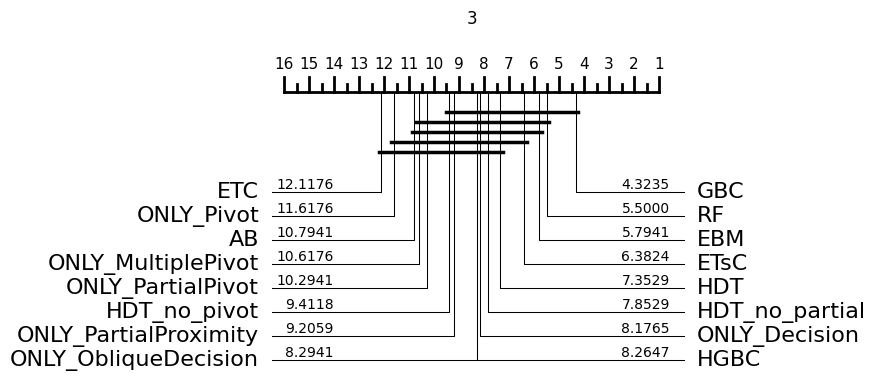

dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
HDT,0.958333,0.977599,0.722754,0.972132,0.721934,0.685714,0.580061,0.487577,0.917774,0.897698,0.678633,0.839196,0.845202,0.762041,0.727342,0.778765,0.387224
HDT_no_partial,0.979033,0.888886,0.741788,0.972132,0.731761,0.558036,0.641596,0.555066,0.866007,0.966583,0.641596,0.798282,0.873056,0.794669,0.689096,0.782509,0.388949
HDT_no_pivot,0.958333,0.983339,0.746662,0.971439,0.709644,0.667060,0.729637,0.562239,0.867333,0.966583,0.819864,0.797897,0.873056,0.724230,0.655089,0.683243,0.337208
ONLY_Decision,0.979033,0.994446,0.743144,0.972138,0.734196,0.780126,0.634694,0.691003,0.846226,0.933333,0.634694,0.823798,0.926284,0.729597,0.718635,0.664976,0.362228
ONLY_MultiplePivot,0.895165,0.897853,0.721230,0.969346,0.612478,0.711254,0.901063,0.407386,0.907735,0.966583,0.901063,0.771404,0.800643,0.755464,0.654708,0.645930,0.378392


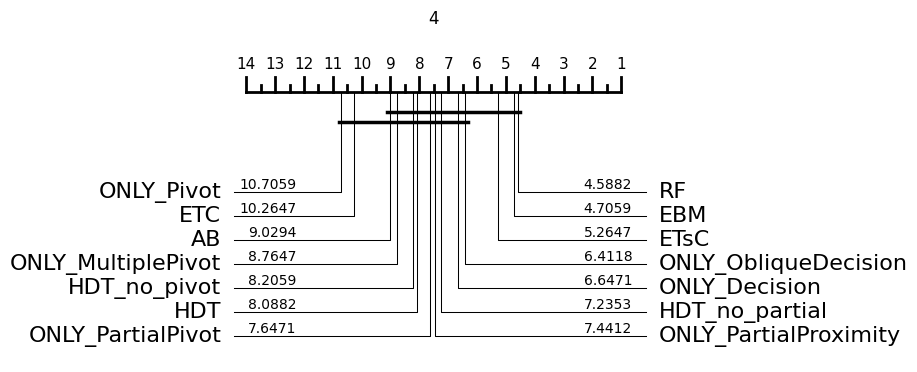

dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
HDT,0.958333,0.977599,0.702275,0.971433,0.722359,0.683264,0.538831,0.662773,0.917774,0.932660,0.818519,0.839196,0.873056,0.770870,0.686247,0.737993,0.387224
HDT_no_partial,0.979033,0.888886,0.704970,0.971433,0.729669,0.688889,0.816799,0.555066,0.897727,0.966583,0.816799,0.798282,0.873056,0.760309,0.689096,0.826547,0.388949
HDT_no_pivot,0.958333,0.983339,0.724828,0.970039,0.716861,0.700971,0.729637,0.562239,0.827154,0.966583,0.813976,0.797897,0.877395,0.744328,0.662339,0.721993,0.337208
ONLY_Decision,0.979033,0.994446,0.737877,0.972138,0.734575,0.779909,0.635979,0.613400,0.834586,0.933333,0.635979,0.837266,0.926284,0.727028,0.718635,0.664976,0.362228
ONLY_MultiplePivot,0.876263,0.897853,0.718416,0.969346,0.627106,0.714815,0.907183,0.407386,0.907735,0.966583,0.907183,0.771404,0.800643,0.805952,0.654708,0.645930,0.378392


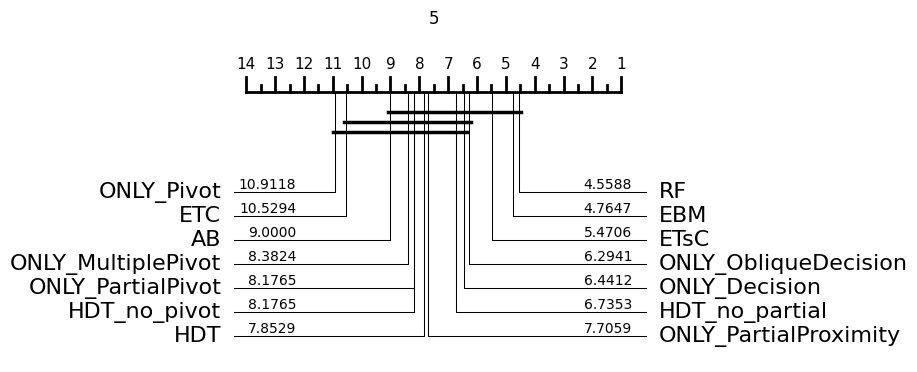

dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
Dart,0.979033,0.983056,0.742498,0.969339,0.769948,0.703777,0.822487,0.663616,0.908154,0.933333,0.822487,0.859497,0.873056,0.810281,0.781579,0.762639,0.380777
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
HDT,0.958333,0.977599,0.701827,0.971433,0.729669,0.670748,0.880765,0.470679,0.917774,0.932660,0.827648,0.783474,0.873056,0.782432,0.727342,0.627796,0.387224
HDT_no_partial,0.979033,0.847508,0.712095,0.971433,0.717484,0.688889,0.807099,0.541222,0.866007,0.966583,0.807099,0.765800,0.873056,0.766717,0.682771,0.826547,0.388949
HDT_no_pivot,0.958333,0.983339,0.722484,0.968639,0.727417,0.730144,0.729637,0.562239,0.908154,0.966583,0.559729,0.832188,0.873056,0.735725,0.680604,0.758009,0.337208
ONLY_Decision,0.979033,0.994446,0.736299,0.969339,0.727541,0.755464,0.533232,0.613400,0.877273,0.933333,0.533232,0.879955,0.926284,0.737377,0.691122,0.699032,0.362228


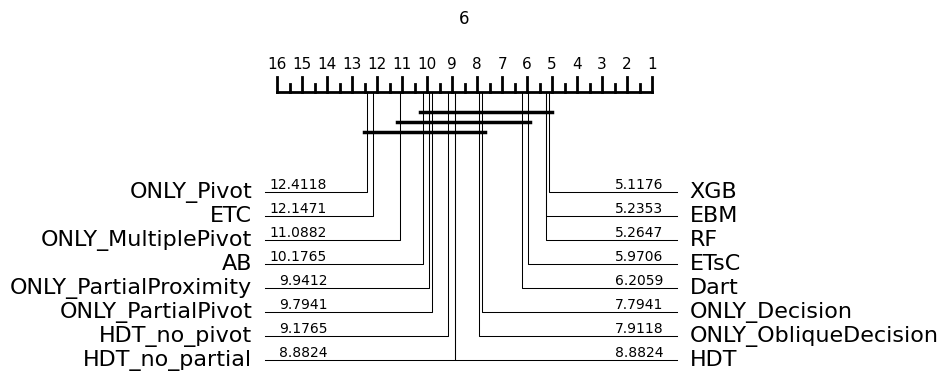

dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
HDT,0.958333,0.983610,0.742460,0.971433,0.695000,0.670748,0.824521,0.434841,0.917774,0.932660,0.715545,0.847653,0.873056,0.746099,0.718149,0.700116,0.387224
HDT_no_partial,0.979033,0.877530,0.704816,0.971433,0.707352,0.688889,0.807099,0.555066,0.866007,0.966583,0.807099,0.801137,0.873056,0.781253,0.672871,0.826547,0.388949
HDT_no_pivot,0.958333,0.983339,0.702483,0.971439,0.709971,0.686035,0.729637,0.503755,0.847926,0.966583,0.657785,0.764895,0.873056,0.768954,0.664449,0.758009,0.337208
ONLY_Decision,0.979033,0.994446,0.745552,0.970039,0.732217,0.711450,0.642474,0.613400,0.866007,0.933333,0.642474,0.837266,0.926284,0.734534,0.689741,0.664976,0.362228
ONLY_MultiplePivot,0.897275,0.897853,0.716392,0.968639,0.648020,0.668817,0.741323,0.407386,0.907735,0.966583,0.741323,0.771404,0.845202,0.768954,0.654708,0.645930,0.378392


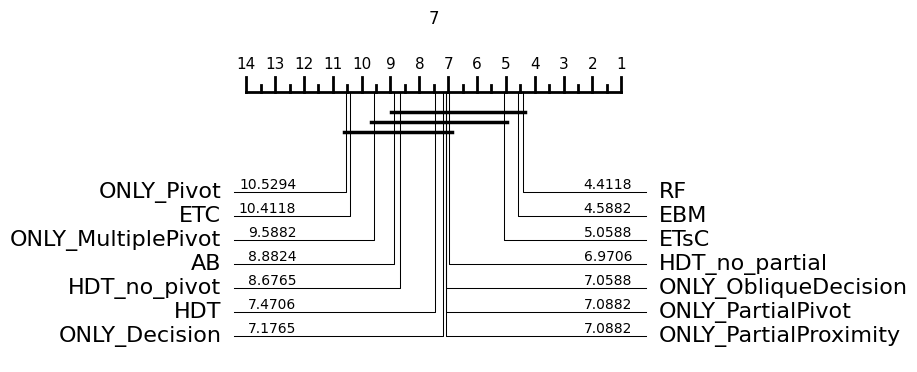

dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
HDT,0.958333,0.983339,0.707410,0.970733,0.712484,0.694712,0.855541,0.541604,0.917774,0.932660,0.872560,0.776274,0.900000,0.723433,0.719596,0.627796,0.387224
HDT_no_partial,0.979033,0.879336,0.685000,0.970733,0.697180,0.688889,0.807099,0.555066,0.866007,0.966583,0.807099,0.790222,0.873056,0.781253,0.663432,0.826547,0.388949
HDT_no_pivot,0.958333,0.983339,0.724663,0.968639,0.744974,0.730144,0.729637,0.562239,0.887232,0.966583,0.519217,0.797897,0.900692,0.774244,0.712883,0.769838,0.337208
ONLY_Decision,0.979033,0.994446,0.738529,0.967939,0.737485,0.706552,0.658210,0.613400,0.887232,0.933333,0.658210,0.842341,0.926284,0.744942,0.719928,0.623183,0.362228
ONLY_MultiplePivot,0.897275,0.897853,0.717413,0.966538,0.637117,0.659423,0.741323,0.472893,0.907735,0.966583,0.741323,0.755909,0.845202,0.771990,0.654708,0.645930,0.378392


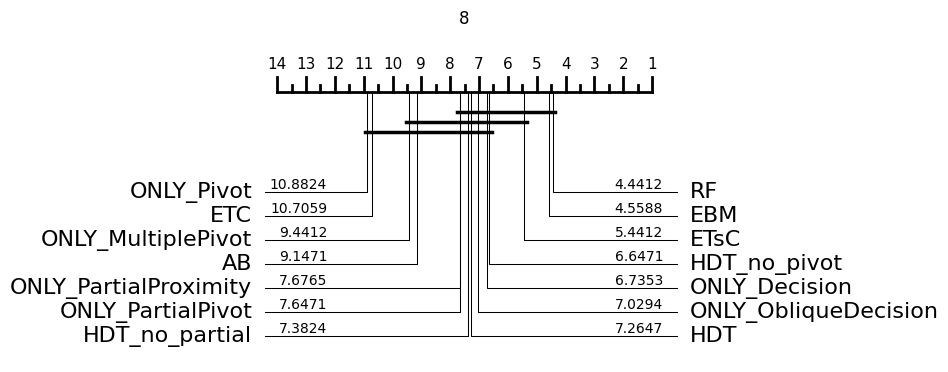

dataset,algerian,auction,bankMarketing,compass,covertype,diabetes,ecoli,glass,home,iris,magic,page,seeds,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,
AB,0.958333,0.858380,0.765000,0.972138,0.724559,0.767722,0.480934,0.539031,0.856105,0.933333,0.480934,0.689454,0.873056,0.774709,0.564469,0.815296,0.207336
EBM,0.958333,0.994446,0.772430,0.972138,0.777097,0.721492,0.870632,0.498003,0.908493,0.933333,0.870632,0.845588,0.873056,0.813397,0.784667,0.829409,0.267622
ETC,0.895165,0.719986,0.664589,0.936248,0.586754,0.568466,0.711855,0.636111,0.876661,0.866667,0.635366,0.740186,0.879321,0.798423,0.651364,0.766677,0.349075
ETsC,0.937844,0.880227,0.754994,0.962295,0.787499,0.692100,0.898410,0.543103,0.887232,0.966583,0.878307,0.885419,0.873056,0.813397,0.709920,0.815247,0.404608
HDT,0.958333,0.977599,0.684874,0.969333,0.744974,0.670748,0.824521,0.475397,0.917774,0.899749,0.652929,0.838916,0.873056,0.758435,0.727342,0.627796,0.387224
HDT_no_partial,0.979033,0.888886,0.677450,0.969333,0.677401,0.688889,0.807099,0.555066,0.866007,0.966583,0.807099,0.804641,0.873056,0.786566,0.716348,0.826547,0.388949
HDT_no_pivot,0.958333,0.983056,0.727457,0.964427,0.674341,0.730144,0.729637,0.562239,0.908154,0.966583,0.541455,0.834644,0.873056,0.800590,0.655089,0.758009,0.337208
ONLY_Decision,0.979033,0.994446,0.709819,0.967239,0.747486,0.715646,0.643268,0.613400,0.908154,0.933333,0.643268,0.853113,0.926284,0.748017,0.719387,0.623183,0.362228
ONLY_MultiplePivot,0.897275,0.897853,0.698523,0.965136,0.629963,0.653800,0.731564,0.423810,0.897727,0.966583,0.731564,0.771927,0.845202,0.765242,0.654708,0.645930,0.378392


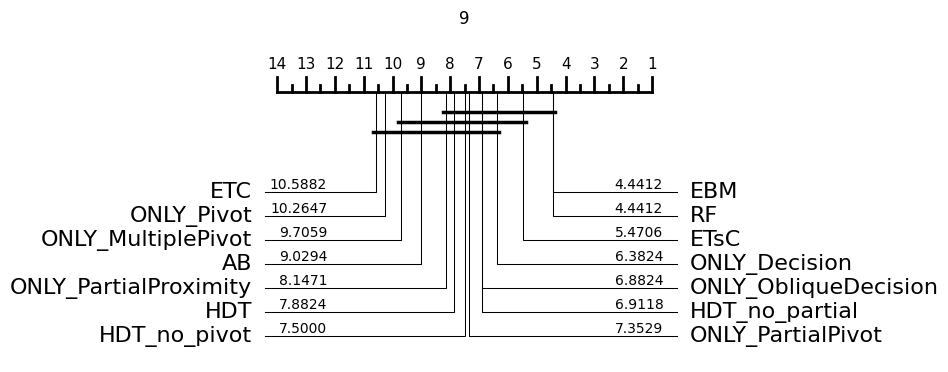

In [404]:
from aeon.visualisation import plot_critical_difference
for i in range(1, 10):
    df_best = df[(df.max_depth == i) | (np.isnan(df.max_depth))]\
                    .sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)
    
    df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='f1_macro_test')
    
    df_best_pivot.dropna(inplace=True)
    #df_best_pivot.fillna(.0, inplace=True)
    
    display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))
    
    plot_critical_difference(df_best_pivot.values, labels=df_best_pivot.columns, lower_better=False, alpha=.1, test='nemenyi')
    plt.title(f'{i}')
    plt.show()

In [6]:
df_best = df.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

np.unique(df_best[df_best.method == 'HDT'].PartialPivotTreeStumpClassifier.values, return_counts=True)

(array(["{'n_shapelets': 10, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': 'cluster', 'n_jobs': 32, 'random_state': 42}",
        "{'n_shapelets': 10, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': 'random', 'n_jobs': 32, 'random_state': 42}",
        "{'n_shapelets': 10, 'n_ts_for_selection': 0.5, 'n_features_strategy': 'elbow', 'selection': 'cluster', 'n_jobs': 32, 'random_state': 42}",
        "{'n_shapelets': 100, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': 'cluster', 'n_jobs': 32, 'random_state': 42}",
        "{'n_shapelets': 100, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': 'random', 'n_jobs': 32, 'random_state': 42}",
        "{'n_shapelets': 100, 'n_ts_for_selection': 0.5, 'n_features_strategy': 'elbow', 'selection': 'cluster', 'n_jobs': 32, 'random_state': 42}",
        "{'n_shapelets': 100, 'n_ts_for_selection': 0.5, 'n_features_strategy': 'elbow', 'selection': 'random',

In [7]:
df_best = df.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

np.unique(df_best[df_best.method == 'HDT'].max_depth.values, return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., nan]),
 array([1, 2, 7, 3, 4, 2, 2, 1, 1, 2]))

In [8]:
sorted(df.dataset.unique())

['adult',
 'algerian',
 'auction',
 'bank',
 'bankMarketing',
 'breast',
 'compass',
 'covertype',
 'diabetes',
 'ecoli',
 'eye',
 'german_credit',
 'glass',
 'heloc',
 'home',
 'ionosphere',
 'iris',
 'magic',
 'page',
 'seeds',
 'sonar',
 'sylvine',
 'taiwan_credit',
 'titanic',
 'vehicle',
 'vertebral',
 'wine']

In [9]:
lista_dataset = [
    'iris',
    'vertebral',
    'home',
    'auction',
    'seeds',
    'ecoli',
    'bankMarketing',
    'magic',
    'diabetes',
    'titanic',
    'glass',
    'covertype'
]

df_dataset = df[df.dataset.isin(lista_dataset)]

#print(len(lista_dataset))
#df_dataset.dataset.unique()

In [10]:
df_original = df.copy()
#df = df_original

In [11]:
df.method.unique()

array(['ONLY_PartialPivot', 'XGB', 'HDT', 'HDT_no_pivot',
       'HDT_no_partial', 'ONLY_Decision', 'ONLY_PartialProximity', 'Dart',
       'ONLY_Pivot', 'ONLY_MultiplePivot', 'RF', 'LGBM',
       'ONLY_ObliqueDecision', 'ETC', 'GBC', 'AB', 'ETsC', 'EBM', 'HGBC'],
      dtype=object)

In [12]:
dfs = []

for method in df.method.unique():
    df_best = df[df.method == method].sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                .groupby(["dataset", "method"]).head(1)

    val, counts = np.unique(df_best[df_best.dataset.isin(lista_dataset)].max_depth.values, return_counts=True)
    filtro = (df_original.method == method) & (df_original.max_depth == val[np.argmax(counts)])

    print(f'{method}: max_depth={val[np.argmax(counts)]}({counts[np.argmax(counts)]})', end='')
    
    if df[filtro].PartialProximityTreeStumpClassifier.values.shape[0] == 0:
        print()
        print()
        continue
    
    if type(df[filtro].PartialProximityTreeStumpClassifier.values[0]) != float:
        df_best = df[filtro].sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                    .groupby(["dataset", "method"]).head(1)
        val, counts = np.unique(df_best[df_best.dataset.isin(lista_dataset)].PartialPivotTreeStumpClassifier.values, return_counts=True)
        print(f'\t pp={val[np.argmax(counts)]}({counts[np.argmax(counts)]})', end='')
        
        filtro |= (df.method == method) & ((df.PartialPivotTreeStumpClassifier == val[np.argmax(counts)]) 
                                           | df.PartialPivotTreeStumpClassifier.isna())
    
        df_best = df[filtro ].sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False)\
                    .groupby(["dataset", "method"]).head(1)
        val, counts = np.unique(df_best[df_best.dataset.isin(lista_dataset)].PartialProximityTreeStumpClassifier.values, return_counts=True)
        filtro |= (df.method == method) & ((df.PartialProximityTreeStumpClassifier == val[np.argmax(counts)]) 
                                           | df.PartialProximityTreeStumpClassifier.isna())
        print(f'\t ppp={val[np.argmax(counts)]}({counts[np.argmax(counts)]})', end='')

    print()
    print()
    
    dfs += [
        df[filtro]
    ]

ONLY_PartialPivot: max_depth=4.0(5)

XGB: max_depth=6.0(12)

HDT: max_depth=4.0(3)	 pp={'n_shapelets': 100, 'n_ts_for_selection': 0.5, 'n_features_strategy': 'elbow', 'selection': 'cluster', 'n_jobs': 32, 'random_state': 42}(5)	 ppp={'n_shapelets': 100, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': 'random', 'proximity_on_same_features': True, 'n_jobs': 32, 'random_state': 42}(11)

HDT_no_pivot: max_depth=1.0(2)	 pp={'n_shapelets': 100, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': 'cluster', 'n_jobs': 32, 'random_state': 42}(7)	 ppp={'n_shapelets': 100, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': 'cluster', 'proximity_on_same_features': True, 'n_jobs': 32, 'random_state': 42}(8)

HDT_no_partial: max_depth=5.0(3)

ONLY_Decision: max_depth=6.0(4)

ONLY_PartialProximity: max_depth=7.0(3)	 pp=nan(1)	 ppp={'n_shapelets': 100, 'n_ts_for_selection': 0.1, 'n_features_strategy': 'elbow', 'selection': 'cluster', 'pr

In [13]:
df_besty = pd.concat(dfs)

df_besty

,max_depth,prune_useless_leaves,stump_selection,random_state,splitter,base_stumps,distance_measure,method,PartialPivotTreeStumpClassifier,train_time,...,ObliqueDecisionTreeStumpClassifier,PivotTreeStumpClassifier,MultiplePivotTreeStumpClassifier,PartialProximityTreeStumpClassifier,criterion,boosting_type,num_leaves,loss,max_iter,USE_COMB
8,4.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 10, 'n_ts_for_selection': 0.1,...",89.781055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,4.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 10, 'n_ts_for_selection': 0.5,...",121.244647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,4.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 100, 'n_ts_for_selection': 0.5...",82.806987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,4.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 100, 'n_ts_for_selection': 0.1...",81.138521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,4.0,True,best,42.0,best,['PartialPivotTreeStumpClassifier'],euclidean,ONLY_PartialPivot,"{'n_shapelets': 100, 'n_ts_for_selection': 0.5...",130.351659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,304.433572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
5354,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,3.385738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
5396,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,347.462986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN
5710,3.0,NaN,NaN,NaN,NaN,NaN,NaN,HGBC,NaN,2.964223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,log_loss,100.0,NaN


In [14]:
df_besty.method.unique()

array(['ONLY_PartialPivot', 'XGB', 'HDT', 'HDT_no_pivot',
       'HDT_no_partial', 'ONLY_Decision', 'ONLY_PartialProximity', 'Dart',
       'ONLY_Pivot', 'ONLY_MultiplePivot', 'LGBM', 'ONLY_ObliqueDecision',
       'GBC', 'HGBC'], dtype=object)

In [15]:
df_best.dataset.unique()

array(['wine', 'vertebral', 'vehicle', 'titanic', 'taiwan_credit',
       'sylvine', 'seeds', 'page', 'magic', 'iris', 'ionosphere', 'home',
       'heloc', 'glass', 'german_credit', 'eye', 'ecoli', 'diabetes',
       'covertype', 'compass', 'breast', 'bankMarketing', 'bank',
       'auction', 'algerian', 'adult'], dtype=object)

dataset,adult,algerian,auction,bankMarketing,breast,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,ionosphere,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,,,
AB,0.802668,0.958333,0.858380,0.765000,0.971277,0.972138,0.724559,0.767722,0.480934,0.527686,0.719443,0.539031,0.724849,0.856105,0.952296,0.933333,0.480934,0.689454,0.873056,0.922461,0.673559,0.774709,0.564469,0.815296,0.207336
Dart,0.820070,0.979033,0.983056,0.742498,0.971277,0.969339,0.769948,0.703777,0.822487,0.524810,0.730094,0.663616,0.705104,0.908154,0.954105,0.933333,0.822487,0.859497,0.873056,0.934985,0.685231,0.810281,0.781579,0.762639,0.380777
GBC,0.822519,0.979033,0.994446,0.767429,0.961486,0.972138,0.764712,0.721492,0.893074,0.547429,0.696455,0.629365,0.727161,0.886622,0.937057,0.966583,0.893074,0.797499,0.926284,0.924932,0.690958,0.774370,0.791705,0.840537,0.376913
HDT,0.780905,0.958333,0.983610,0.722754,0.952129,0.972138,0.722359,0.655782,0.880765,0.552363,0.632353,0.539316,0.687812,0.917774,0.908974,0.932660,0.827648,0.847653,0.845202,0.917384,0.695936,0.797241,0.686247,0.778765,0.367379
HDT_no_partial,0.785545,0.979033,0.747421,0.704970,0.904778,0.971433,0.729669,0.591845,0.816799,0.525647,0.693289,0.564546,0.711328,0.897727,0.922098,0.966583,0.816799,0.780663,0.873056,0.912473,0.669374,0.760309,0.631914,0.826547,0.242139
HDT_no_pivot,0.751049,0.958333,0.983056,0.746662,0.931367,0.971439,0.737367,0.646465,0.729637,0.447941,0.411765,0.503755,0.695997,0.876661,0.920493,0.932660,0.519217,0.834644,0.877395,0.917384,0.695663,0.749534,0.662339,0.827778,0.337208
HGBC,0.804074,0.958333,0.953628,0.782466,0.961486,0.972138,0.769424,0.724170,0.617007,0.537474,0.703648,0.524711,0.723280,0.877273,0.968528,0.899749,0.617007,0.873706,0.814964,0.932429,0.689700,0.781532,0.789571,0.768450,0.264206
LGBM,0.822401,0.958333,0.988799,0.749975,0.961486,0.971439,0.782488,0.674877,0.626830,0.486778,0.691945,0.527217,0.714531,0.897727,0.984420,0.899749,0.626830,0.881442,0.844575,0.937453,0.692777,0.802607,0.773174,0.750455,0.404176
ONLY_Decision,0.782789,0.979033,0.921142,0.736299,0.914749,0.969339,0.727541,0.755464,0.533232,0.527915,0.580355,0.657814,0.708946,0.877273,0.892911,0.933333,0.533232,0.879955,0.900000,0.934974,0.669860,0.737377,0.691122,0.699032,0.229725


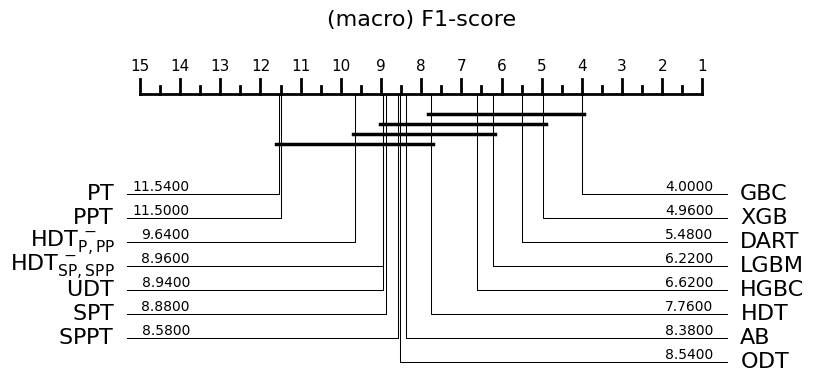

In [16]:
from aeon.visualisation import plot_critical_difference

df_best = df_besty.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)
df_best_AB = df[df.method=='AB'].sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)
df_best = pd.concat([df_best, df_best_AB])

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='f1_macro_test')

df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

plot_critical_difference(df_best_pivot.values, 
                         labels=[viz_dict[x][0] if x in viz_dict else x for x in df_best_pivot.columns], 
                         lower_better=False, alpha=.1, test='nemenyi', width=7.5)
plt.title('(macro) F1-score', fontsize=16)

plt.savefig("z_img_3Final_cd_F1.png", dpi=300, bbox_inches='tight', )

plt.show()

In [19]:
from aeon.visualisation import plot_critical_difference

df_best = df_besty.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)
df_best_AB = df[df.method=='AB'].sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)
df_best = pd.concat([df_best, df_best_AB])

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='f1_macro_test')

df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

print(df_best_pivot.T.to_latex(float_format=lambda x: round(x, 3)))

dataset,adult,algerian,auction,bankMarketing,breast,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,ionosphere,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,,,
AB,0.802668,0.958333,0.858380,0.765000,0.971277,0.972138,0.724559,0.767722,0.480934,0.527686,0.719443,0.539031,0.724849,0.856105,0.952296,0.933333,0.480934,0.689454,0.873056,0.922461,0.673559,0.774709,0.564469,0.815296,0.207336
Dart,0.820070,0.979033,0.983056,0.742498,0.971277,0.969339,0.769948,0.703777,0.822487,0.524810,0.730094,0.663616,0.705104,0.908154,0.954105,0.933333,0.822487,0.859497,0.873056,0.934985,0.685231,0.810281,0.781579,0.762639,0.380777
GBC,0.822519,0.979033,0.994446,0.767429,0.961486,0.972138,0.764712,0.721492,0.893074,0.547429,0.696455,0.629365,0.727161,0.886622,0.937057,0.966583,0.893074,0.797499,0.926284,0.924932,0.690958,0.774370,0.791705,0.840537,0.376913
HDT,0.780905,0.958333,0.983610,0.722754,0.952129,0.972138,0.722359,0.655782,0.880765,0.552363,0.632353,0.539316,0.687812,0.917774,0.908974,0.932660,0.827648,0.847653,0.845202,0.917384,0.695936,0.797241,0.686247,0.778765,0.367379
HDT_no_partial,0.785545,0.979033,0.747421,0.704970,0.904778,0.971433,0.729669,0.591845,0.816799,0.525647,0.693289,0.564546,0.711328,0.897727,0.922098,0.966583,0.816799,0.780663,0.873056,0.912473,0.669374,0.760309,0.631914,0.826547,0.242139
HDT_no_pivot,0.751049,0.958333,0.983056,0.746662,0.931367,0.971439,0.737367,0.646465,0.729637,0.447941,0.411765,0.503755,0.695997,0.876661,0.920493,0.932660,0.519217,0.834644,0.877395,0.917384,0.695663,0.749534,0.662339,0.827778,0.337208
HGBC,0.804074,0.958333,0.953628,0.782466,0.961486,0.972138,0.769424,0.724170,0.617007,0.537474,0.703648,0.524711,0.723280,0.877273,0.968528,0.899749,0.617007,0.873706,0.814964,0.932429,0.689700,0.781532,0.789571,0.768450,0.264206
LGBM,0.822401,0.958333,0.988799,0.749975,0.961486,0.971439,0.782488,0.674877,0.626830,0.486778,0.691945,0.527217,0.714531,0.897727,0.984420,0.899749,0.626830,0.881442,0.844575,0.937453,0.692777,0.802607,0.773174,0.750455,0.404176
ONLY_Decision,0.782789,0.979033,0.921142,0.736299,0.914749,0.969339,0.727541,0.755464,0.533232,0.527915,0.580355,0.657814,0.708946,0.877273,0.892911,0.933333,0.533232,0.879955,0.900000,0.934974,0.669860,0.737377,0.691122,0.699032,0.229725


\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
dataset & adult & algerian & auction & bankMarketing & breast & compass & covertype & diabetes & ecoli & eye & german_credit & glass & heloc & home & ionosphere & iris & magic & page & seeds & sylvine & taiwan_credit & titanic & vehicle & vertebral & wine \\
method &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
AB & 0.803 & 0.958 & 0.858 & 0.765 & 0.971 & 0.972 & 0.725 & 0.768 & 0.481 & 0.528 & 0.719 & 0.539 & 0.725 & 0.856 & 0.952 & 0.933 & 0.481 & 0.689 & 0.873 & 0.922 & 0.674 & 0.775 & 0.564 & 0.815 & 0.207 \\
Dart & 0.82 & 0.979 & 0.983 & 0.742 & 0.971 & 0.969 & 0.77 & 0.704 & 0.822 & 0.525 & 0.73 & 0.664 & 0.705 & 0.908 & 0.954 & 0.933 & 0.822 & 0.859 & 0.873 & 0.935 & 0.685 & 0.81 & 0.782 & 0.763 & 0.381 \\
GBC & 0.823 & 0.979 & 0.994 & 0.767 & 0.961 & 0.972 & 0.765 & 0.721 & 0.893 & 0.547 & 0.696 & 0.629 & 0.727 & 0.887 & 0.937 & 0.967 & 0.893 & 0.797 & 0.926 & 0.925 & 0.691 & 0.774 & 0.

In [26]:
from aeon.visualisation import plot_critical_difference

df_best = df_besty.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)
df_best_AB = df[df.method=='AB'].sort_values(by=["dataset", "method", 'pred_time',], ascending=[False, False, True]).groupby(["dataset", "method"]).head(1)
df_best = pd.concat([df_best, df_best_AB])

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='pred_time')

df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

print(df_best_pivot.T.to_latex(float_format=lambda x: round(x, 2)))

dataset,adult,algerian,auction,bankMarketing,breast,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,ionosphere,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,,,
AB,0.019987,0.019003,0.011255,0.023953,0.005448,0.018759,0.009776,0.008526,0.017639,0.006033,0.005598,0.004494,0.009143,0.013152,0.007396,0.007569,0.008061,0.012489,0.008537,0.009591,0.017813,0.008435,0.013688,0.009397,0.008891
Dart,0.061222,0.003634,12.777853,0.058497,0.032856,0.030463,0.012017,0.015210,0.337798,0.109632,0.026664,0.146165,0.053729,5.505316,0.012091,0.201043,9.844425,0.105728,0.746127,0.068717,0.150019,0.351708,1.083138,0.148655,2.961904
GBC,0.081020,0.000576,0.007837,0.001276,0.002265,0.003469,0.001153,0.000851,0.002442,0.001066,0.010600,0.007284,0.004068,0.000663,0.000687,0.001358,0.002425,0.047505,0.016458,0.001382,0.008806,0.000892,0.019888,0.005223,0.171803
HDT,0.010643,0.001196,0.548527,0.689883,0.002237,0.002316,0.013316,0.104781,0.256840,0.002782,0.001916,0.004749,0.002634,0.014693,0.001704,0.003134,0.845984,0.187458,0.145386,0.000731,0.005553,1.274967,0.072844,0.003983,0.346160
HDT_no_partial,0.016440,0.000196,0.006684,0.011499,0.002720,0.006848,0.009537,0.021916,0.006265,0.008049,0.007392,0.003816,0.060560,0.006966,0.002736,0.001285,0.011788,0.011343,0.002479,0.005841,0.016039,0.030570,0.007163,0.004809,0.015938
HDT_no_pivot,0.013875,0.000396,0.009126,0.003068,0.000576,0.001838,0.003238,0.000561,0.004939,0.000665,0.000091,0.003707,0.003254,0.001338,0.000481,0.001002,0.006873,0.030025,0.002905,0.000461,0.011804,0.000525,0.007504,0.000949,0.250251
HGBC,0.012989,0.002255,9.551378,8.515864,0.006324,0.447142,0.002918,10.819243,69.650887,0.003305,0.005301,0.015402,0.004524,7.642965,0.003337,12.274380,65.804547,0.012096,22.061384,0.007700,0.095229,4.892732,0.080973,12.367673,0.030471
LGBM,0.004232,0.001323,0.023137,0.010424,0.009499,0.011717,0.003768,0.006766,0.014161,0.002641,0.016066,0.001324,0.002281,0.023010,0.001370,0.001155,0.042939,0.003580,0.018427,0.006274,0.004834,0.001695,0.003916,0.002220,0.065360
ONLY_Decision,0.015086,0.000233,0.001528,0.002537,0.000640,0.002392,0.003052,0.001562,0.001178,0.001986,0.001916,0.001035,0.005335,0.001165,0.000552,0.000438,0.001188,0.003319,0.000687,0.002167,0.014799,0.001987,0.003026,0.001176,0.003219


\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
dataset & adult & algerian & auction & bankMarketing & breast & compass & covertype & diabetes & ecoli & eye & german_credit & glass & heloc & home & ionosphere & iris & magic & page & seeds & sylvine & taiwan_credit & titanic & vehicle & vertebral & wine \\
method &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
AB & 0.02 & 0.02 & 0.01 & 0.02 & 0.01 & 0.02 & 0.01 & 0.01 & 0.02 & 0.01 & 0.01 & 0.0 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.02 & 0.01 & 0.01 & 0.01 & 0.01 \\
Dart & 0.06 & 0.0 & 12.78 & 0.06 & 0.03 & 0.03 & 0.01 & 0.02 & 0.34 & 0.11 & 0.03 & 0.15 & 0.05 & 5.51 & 0.01 & 0.2 & 9.84 & 0.11 & 0.75 & 0.07 & 0.15 & 0.35 & 1.08 & 0.15 & 2.96 \\
GBC & 0.08 & 0.0 & 0.01 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.01 & 0.01 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.05 & 0.02 & 0.0 & 0.01 & 0.0 & 0.02 & 0.01 & 0.17 \\
HDT & 0.01 & 0.0 & 0.55 & 0.69 & 0.0 & 0.0 & 0.01 & 0.1 & 0.26 & 

In [ ]:
df.pred_time

In [415]:
df[(df.dataset == 'adult') & (df.method == 'HDT_no_partial')][['max_depth', 'f1_macro_test']]

,max_depth,f1_macro_test
3079,5.0,0.785545
3115,5.0,0.785545
3119,2.0,0.730601


In [416]:
df[(df.dataset == 'taiwan_credit') & (df.method == 'HDT_no_partial')][['max_depth', 'f1_macro_test', 'USE_COMB']]

,max_depth,f1_macro_test,USE_COMB
5332,2.0,0.679316,NaN
5337,5.0,0.670000,False
5353,5.0,0.669374,True


In [417]:
#ONLY_PartialProximity
df[(df.dataset == 'breast') & (df.method == 'ONLY_PartialProximity')][['max_depth', 'f1_macro_test']]

,max_depth,f1_macro_test
4631,4.0,0.931367
4634,7.0,0.952638


In [418]:
df[(df.dataset == 'ionosphere') & (df.method == 'ONLY_PartialProximity')][['max_depth', 'f1_macro_test']]

,max_depth,f1_macro_test
2488,7.0,0.969130
2492,4.0,0.937057


In [419]:
df_best.n_nodes_test

3203      NaN
3304     57.0
3239    346.0
3333     14.0
3295     57.0
        ...  
3121      1.0
3079     22.0
3084      6.0
3098      NaN
3113      NaN
Name: n_nodes_test, Length: 356, dtype: float64

dataset,adult,algerian,auction,bankMarketing,breast,compass,covertype,diabetes,ecoli,eye,german_credit,glass,heloc,home,ionosphere,iris,magic,page,seeds,sylvine,taiwan_credit,titanic,vehicle,vertebral,wine
method,,,,,,,,,,,,,,,,,,,,,,,,,
HDT,6.000000,2.000000,27.000000,13.000000,11.000000,2.000000,24.000000,1.000000,21.000000,5.000000,5.000000,12.000000,3.000000,22.000000,6.000000,4.000000,23.000000,46.000000,7.000000,1.000000,3.000000,54.000000,24.000000,10.000000,985.000000
HDT_no_partial,22.000000,3.000000,13.000000,26.000000,9.000000,8.000000,18.000000,20.000000,16.000000,22.000000,19.000000,14.000000,29.000000,16.000000,10.000000,5.000000,16.000000,23.000000,9.000000,22.000000,20.000000,22.000000,22.000000,15.000000,27.000000
HDT_no_pivot,1.000000,1.000000,26.000000,13.000000,1.000000,3.000000,6.000000,1.000000,36.000000,1.000000,0.000000,25.000000,1.000000,3.000000,1.000000,2.000000,35.000000,63.000000,9.000000,1.000000,1.000000,1.000000,18.000000,3.000000,1103.000000
ONLY_Decision,38.000000,3.000000,25.000000,37.000000,17.000000,10.000000,32.000000,26.000000,25.000000,40.000000,34.000000,24.000000,53.000000,21.000000,14.000000,7.000000,25.000000,30.000000,11.000000,30.000000,46.000000,28.000000,35.000000,21.000000,56.000000
ONLY_MultiplePivot,38.000000,27.000000,29.000000,41.000000,18.000000,16.000000,44.000000,31.000000,27.000000,44.000000,38.000000,25.000000,40.000000,32.000000,25.000000,10.000000,27.000000,40.000000,22.000000,33.000000,31.000000,36.000000,34.000000,36.000000,52.000000
ONLY_ObliqueDecision,38.000000,3.000000,27.000000,44.000000,17.000000,8.000000,35.000000,33.000000,31.000000,40.000000,34.000000,25.000000,49.000000,24.000000,12.000000,7.000000,31.000000,32.000000,11.000000,27.000000,44.000000,27.000000,38.000000,19.000000,57.000000
ONLY_PartialPivot,11.000000,3.000000,9.000000,14.000000,8.000000,3.000000,10.000000,12.000000,12.000000,13.000000,12.000000,10.000000,13.000000,11.000000,12.000000,4.000000,12.000000,15.000000,6.000000,13.000000,10.000000,15.000000,14.000000,10.000000,14.000000
ONLY_PartialProximity,51.000000,1.000000,20.000000,41.000000,4.000000,2.000000,32.000000,23.000000,8.000000,1.000000,7.000000,7.000000,4.000000,7.000000,8.000000,2.000000,11.000000,32.000000,3.000000,6.000000,2.000000,7.000000,8.000000,4.000000,346.000000
ONLY_Pivot,45.000000,14.000000,41.000000,45.000000,14.000000,34.000000,33.000000,36.000000,20.000000,38.000000,41.000000,15.000000,48.000000,18.000000,13.000000,5.000000,20.000000,35.000000,9.000000,39.000000,54.000000,28.000000,26.000000,20.000000,57.000000


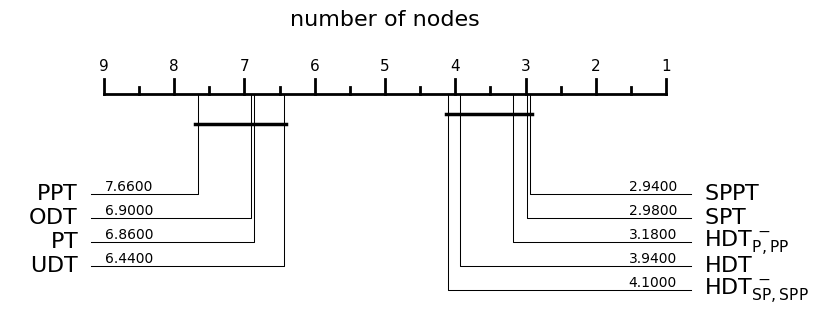

In [449]:
from aeon.visualisation import plot_critical_difference

df_best = df_besty.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='n_nodes_test')

df_best_pivot.dropna(subset=['iris'], inplace=True, axis=1)
df_best_pivot.dropna(inplace=True)

display(df_best_pivot.T.style.background_gradient(cmap='coolwarm'))

plot_critical_difference(df_best_pivot.values, 
                         labels=[viz_dict[x][0] if x in viz_dict else x for x in df_best_pivot.columns], 
                         lower_better=True, alpha=.1, test='nemenyi', width=7.5)
plt.title('number of nodes', fontsize=16)
plt.savefig("z_img_3Final_cd_F1_nodi_all_hyper.png", dpi=300, bbox_inches='tight', )

plt.show()

In [384]:
from aeon.visualisation import plot_critical_difference

df_best = df_besty.sort_values(by=["dataset", "method", 'f1_macro_val',], ascending=False).groupby(["dataset", "method"]).head(1)

df_best_pivot = df_best.pivot(index=['dataset'], columns=['method'], values='pred_time')

df_best_pivot.dropna(inplace=True)
#df_best_pivot.fillna(.0, inplace=True)
#df_best_pivot.T.style.background_gradient(cmap='coolwarm')

df_best_pivot.mean(axis=0)

method
Dart                     1.513029
GBC                      0.017306
HDT                      0.197412
HDT_no_partial           0.011888
HDT_no_pivot             0.015582
HGBC                     9.752233
LGBM                     0.011794
ONLY_Decision            0.003087
ONLY_MultiplePivot       0.091824
ONLY_ObliqueDecision     0.019359
ONLY_PartialPivot        0.281826
ONLY_PartialProximity    0.507518
ONLY_Pivot               0.054365
XGB                      0.018323
dtype: float64

In [74]:
df_best.filename

3090    res_tmp/wine/wine|XGB|d454123e87a0d960b8608454...
3038    res_tmp/wine/wine|ONLY_Pivot|3ab20f9788402e062...
3126    res_tmp/wine/wine|ONLY_PartialProximity|c96e2a...
3220    res_tmp/wine/wine|ONLY_PartialPivot|998dbf2fb3...
3182    res_tmp/wine/wine|ONLY_ObliqueDecision|91fe8a5...
                              ...                        
4175    res_tmp/algerian/algerian|HDT_no_partial|99904...
4283    res_tmp/algerian/algerian|HDT|3db454807084b602...
4153    res_tmp/algerian/algerian|GBC|a1331d0860a544f9...
4046    res_tmp/algerian/algerian|Dart|c5bf5bffc861ed8...
3006    res_tmp/adult/adult|HDT|3db454807084b602a6a00f...
Name: filename, Length: 252, dtype: object

In [447]:
res = dict()

for dataset, method, filename in df_best[df_best.method.isin(['ONLY_Decision', 'HDT'])][['dataset', 'method', 'filename']].values:
    if dataset not in res:
        res[dataset] = []
    if method == 'ONLY_Decision':
        res[dataset].insert(0, filename)
    else:
        res[dataset].append(filename)

for k in res.keys():
    for i, filename in enumerate(res[k]):
        with open(filename.replace(".csv", ".pickle"), 'rb') as file:
            rt = pickle.load(file)
        res[k][i] = get_info_gain(rt.root.stump)

df_information_gain = pd.DataFrame([[k]+ v for k, v in res.items()], columns=['dataset', 'IG_UDT', 'IG_HDT']).dropna()

df_information_gain['dataset_group'] = df_information_gain.dataset.apply(lambda x: 'small' if x in lista_dataset else 'big')

df_information_gain.sort_values(by=['dataset_group'])

,dataset,IG_UDT,IG_HDT,dataset_group
0,wine,0.084020,0.116983,big
20,breast,0.337345,0.388156,big
19,compass,0.436796,0.436796,big
15,eye,0.006652,0.009882,big
14,german_credit,0.042189,0.048644,big
23,algerian,0.462248,0.482158,big
10,ionosphere,0.177718,0.305183,big
12,heloc,0.079078,0.079078,big
24,adult,0.075554,0.089166,big
5,sylvine,0.340040,0.341399,big


In [448]:
df_information_gain[df_information_gain.columns[1:]].groupby(['dataset_group']).agg(['mean', 'std'])

IG_UDT              IG_HDT          
                   mean       std      mean       std
dataset_group                                        
big            0.171902  0.161986  0.192980  0.169573
small          0.179092  0.105927  0.202665  0.102203

In [84]:
print(len(df_information_gain.dataset.unique()))
df_information_gain.dataset.unique()

20


array(['wine', 'vertebral', 'vehicle', 'titanic', 'seeds', 'page',
       'magic', 'iris', 'ionosphere', 'home', 'glass', 'eye', 'ecoli',
       'diabetes', 'covertype', 'compass', 'breast', 'bankMarketing',
       'auction', 'algerian'], dtype=object)